 # 1. primera metodologia

### 1.0 crear datos sinteticos

In [283]:
import pandas as pd
import numpy as np

#paso 0: parametros
n_activos = 5
periodos=200 # este es T
n_portafolios = 10

# Paso 1: Crear el DataFrame de retornos (5 activos)
fechas = pd.date_range('1974-01-02', periods=periodos, freq='B')  # 20 días hábiles
np.random.seed(42)
data = np.random.rand(periodos, n_activos)  # Generación de retornos aleatorios
df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
df


Activo_1  Activo_2  Activo_3  Activo_4  Activo_5
1974-01-02  0.374540  0.950714  0.731994  0.598658  0.156019
1974-01-03  0.155995  0.058084  0.866176  0.601115  0.708073
1974-01-04  0.020584  0.969910  0.832443  0.212339  0.181825
1974-01-07  0.183405  0.304242  0.524756  0.431945  0.291229
1974-01-08  0.611853  0.139494  0.292145  0.366362  0.456070
...              ...       ...       ...       ...       ...
1974-10-02  0.262264  0.595078  0.051426  0.496366  0.596843
1974-10-03  0.334244  0.770912  0.106598  0.075138  0.728189
1974-10-04  0.495491  0.688402  0.434827  0.246402  0.819102
1974-10-07  0.799416  0.694696  0.272145  0.590231  0.360974
1974-10-08  0.091582  0.917314  0.136819  0.950237  0.446006

[200 rows x 5 columns]

In [284]:
df.mean()

Activo_1    0.492004
Activo_2    0.515033
Activo_3    0.480239
Activo_4    0.508214
Activo_5    0.455793
dtype: float64

In [285]:
# Paso 2: Crear portafolios con pesos aleatorios para 48 portafolios (48 combinaciones)
  # Número de portafolios
pesos = np.random.rand(n_portafolios, n_activos)  # 48 portafolios, 5 activos
pesos = pesos / pesos.sum(axis=1)[:, np.newaxis]  # Normalizamos para que sumen 1

# Multiplicamos los retornos por los pesos para obtener los portafolios
portafolios = np.dot(df.values, pesos.T)

# Paso 3: Crear un DataFrame para los portafolios con los valores calculados
df_portafolios = pd.DataFrame(portafolios, index=fechas, columns=[f'Portafolio_{i+1}' for i in range(n_portafolios)])
df_portafolios


Portafolio_1  Portafolio_2  Portafolio_3  Portafolio_4  \
1974-01-02      0.569560      0.596163      0.637202      0.566983   
1974-01-03      0.582310      0.467844      0.494453      0.465504   
1974-01-04      0.496442      0.521856      0.650476      0.330716   
1974-01-07      0.384891      0.349548      0.365424      0.353763   
1974-01-08      0.344084      0.361446      0.305444      0.422426   
...                  ...           ...           ...           ...   
1974-10-02      0.401674      0.355331      0.391655      0.325556   
1974-10-03      0.387107      0.414906      0.501299      0.229687   
1974-10-04      0.536974      0.556126      0.616879      0.412893   
1974-10-07      0.473228      0.531648      0.482362      0.599370   
1974-10-08      0.538110      0.431076      0.485718      0.462472   

            Portafolio_5  Portafolio_6  Portafolio_7  Portafolio_8  \
1974-01-02      0.508337      0.581507      0.785528      0.561621   
1974-01-03      0.568285      0.490961      0.345584      0.475663   
1974-01-04      0.378186      0.530932      0.763713      0.475590   
1974-01-07      0.364560      0.351975      0.361410      0.341564   
1974-01-08      0.397619      0.346092      0.237821      0.398264   
...                  ...           ...           ...           ...   
1974-10-02      0.378922      0.400714      0.454499      0.300132   
1974-10-03      0.344621      0.462828      0.529461      0.376594   
1974-10-04      0.512437      0.586762      0.585936      0.545618   
1974-10-07      0.503240      0.509295      0.570648      0.533421   
1974-10-08      0.471247      0.487459      0.688829      0.316321   

            Portafolio_9  Portafolio_10  
1974-01-02      0.537852       0.563425  
1974-01-03      0.446006       0.379027  
1974-01-04      0.423107       0.253635  
1974-01-07      0.327495       0.327930  
1974-01-08      0.369169       0.422145  
...                  ...            ...  
1974-10-02      0.464397       0.422752  
1974-10-03      0.479641       0.265731  
1974-10-04      0.579017       0.401198  
1974-10-07      0.555730       0.669868  
1974-10-08      0.572082       0.628884  

[200 rows x 10 columns]

In [286]:
pesos 

array([[0.05898272, 0.17264778, 0.27811755, 0.23328434, 0.25696761],
       [0.22412564, 0.23552041, 0.28890607, 0.08493991, 0.16650797],
       [0.07633337, 0.34081742, 0.32576925, 0.01360512, 0.24347484],
       [0.35271699, 0.06883773, 0.21650829, 0.34899634, 0.01294066],
       [0.18188083, 0.0775459 , 0.24107408, 0.25324312, 0.24625607],
       [0.14245706, 0.25896326, 0.25370817, 0.09585987, 0.24901164],
       [0.03488632, 0.56209112, 0.21682451, 0.11365588, 0.07254217],
       [0.32512897, 0.15870311, 0.33842664, 0.03051785, 0.14722343],
       [0.17067993, 0.25016266, 0.10084436, 0.1980145 , 0.28029854],
       [0.34901172, 0.13201891, 0.013828  , 0.49308792, 0.01205345]])

In [287]:
df_portafolios.mean()

Portafolio_1     0.487184
Portafolio_2     0.489376
Portafolio_3     0.487424
Portafolio_4     0.496231
Portafolio_5     0.486141
Portafolio_6     0.487520
Portafolio_7     0.501613
Portafolio_8     0.486841
Portafolio_9     0.489638
Portafolio_10    0.502438
dtype: float64

## 1.1 Ortogonalización

In [288]:

# Paso 4: Calcular la matriz de covarianzas con una ventana móvil
ventana = 10  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
cov_matrices = []
for i in range(ventana, len(df_portafolios)):
    ventana_datos = df_portafolios.iloc[i-ventana:i]
    cov_matrices.append(ventana_datos.cov().values)



In [289]:
import numpy as np
import pandas as pd

# Lista para almacenar los portafolios dinámicos
portafolios_dinamicos = []

for t, cov in enumerate(cov_matrices):
    cov_matrix = cov

    # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Paso 6: Ordenar los autovalores y autovectores en orden descendente
    idx = eigenvalues.argsort()[::-1]  # Índices ordenados
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Paso 7: Normalizar los eigenvectores seleccionados
    eigenvectors_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
    df_ortogonales = pd.DataFrame(
        np.dot(df_portafolios.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
    mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
    l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

    # Paso 10: Seleccionar los primeros l portafolios ortogonales
    df_ortogonales_l = df_ortogonales.iloc[:, :l]
    portafolios_dinamicos.append(df_ortogonales_l)

    # Mostrar los pesos de los portafolios principales
    #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")
print(f"Pesos de los portafolios principales (autovectores normalizados):")
print(eigenvectors_normalized[:, :l])  # Los pesos de los primeros 'l' portafolios ortogonales

# Mostrar los primeros l portafolios ortogonales
print(df_ortogonales_l.head())



Pesos de los portafolios principales (autovectores normalizados):
[[-0.24670363  0.04541556  0.55013618 -0.14188093  0.47082683]
 [-0.29995471 -0.27989824 -0.02305833 -0.02716826 -0.18833547]
 [-0.19184276 -0.44675289  0.12680052  0.02665279  0.14528325]
 [-0.49176252  0.26018699 -0.07681127 -0.44110793 -0.10538966]
 [-0.297354    0.12915697  0.48823437  0.02360373  0.06834407]
 [-0.22152276 -0.23932651  0.14541035  0.2412388  -0.00703534]
 [-0.23541851 -0.36303975 -0.54054565 -0.04178857  0.60993925]
 [-0.35065865 -0.36779545 -0.03747561 -0.14055175 -0.57358688]
 [-0.19888073  0.00404009  0.04174095  0.81528248 -0.06162294]
 [-0.46379071  0.55790914 -0.34639119  0.19724403  0.03304616]]
            portafolio_ortogonal_1  portafolio_ortogonal_2  \
1974-01-02               -1.750516               -0.526889   
1974-01-03               -1.398149               -0.335528   
1974-01-04               -1.344843               -0.715259   
1974-01-07               -1.052326               -0.261

In [290]:
print(eigenvectors_normalized[:, :])

[[-0.24670363  0.04541556  0.55013618 -0.14188093  0.47082683 -0.10560094
  -0.13639611  0.15709693 -0.07939532  0.5760888 ]
 [-0.29995471 -0.27989824 -0.02305833 -0.02716826 -0.18833547  0.67471698
   0.39406481 -0.2501953   0.00645956  0.34896218]
 [-0.19184276 -0.44675289  0.12680052  0.02665279  0.14528325 -0.43919081
   0.67255827  0.15072514  0.03806237 -0.23732308]
 [-0.49176252  0.26018699 -0.07681127 -0.44110793 -0.10538966 -0.0923956
  -0.04487351 -0.02148806  0.67529225 -0.108891  ]
 [-0.297354    0.12915697  0.48823437  0.02360373  0.06834407  0.38115168
  -0.09235222  0.07068464 -0.24260705 -0.65851211]
 [-0.22152276 -0.23932651  0.14541035  0.2412388  -0.00703534 -0.29057621
  -0.28553281 -0.80354131  0.01157739 -0.04984444]
 [-0.23541851 -0.36303975 -0.54054565 -0.04178857  0.60993925  0.17498103
  -0.29163232  0.10554545 -0.03914888 -0.13593468]
 [-0.35065865 -0.36779545 -0.03747561 -0.14055175 -0.57358688 -0.18493437
  -0.35503345  0.34492136 -0.32226497  0.09235243]
 

In [291]:
# siempre es l=5, en esencia no cambia

## ahora que :( o sea tengo 79 matrices en portafolios dinamicos, se supone que cada uno es una realizacion de la verdadera distribucion??

In [292]:
len(portafolios_dinamicos)

190

#### crear matriz de retornos

In [293]:

import pandas as pd

# Crear una lista vacía para almacenar las filas
filas = []

# Supongamos que portafolios_dinamicos es una lista de DataFrames
for i in range(len(portafolios_dinamicos)):
    # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
    fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
    filas.append(fila)

# Convertir la lista de filas en un DataFrame
resultado_df = pd.DataFrame(filas)

# Mostrar el DataFrame resultante
resultado_df



portafolio_ortogonal_1  portafolio_ortogonal_2  \
1974-01-15               -0.840585                1.154997   
1974-01-16               -2.658950               -0.173074   
1974-01-17               -0.954103               -0.214125   
1974-01-18               -1.385554               -0.102858   
1974-01-21               -1.585035                0.233509   
...                            ...                     ...   
1974-10-01               -1.719060               -0.334115   
1974-10-02               -1.182480                0.063212   
1974-10-03               -1.066944               -0.462911   
1974-10-04               -1.548367               -0.531481   
1974-10-07               -1.668556               -0.271141   

            portafolio_ortogonal_3  portafolio_ortogonal_4  \
1974-01-15                0.019402                0.089442   
1974-01-16               -0.072532               -0.046690   
1974-01-17               -0.175584               -0.012968   
1974-01-18               -0.062266               -0.042974   
1974-01-21               -0.013578               -0.199670   
...                            ...                     ...   
1974-10-01                0.110871               -0.033702   
1974-10-02                0.053248               -0.189034   
1974-10-03               -0.212980               -0.529515   
1974-10-04                0.184941                0.349106   
1974-10-07                0.045671                0.288008   

            portafolio_ortogonal_5  
1974-01-15                0.056130  
1974-01-16                0.039680  
1974-01-17               -0.052757  
1974-01-18                0.045912  
1974-01-21                0.010867  
...                            ...  
1974-10-01               -0.180452  
1974-10-02               -0.318345  
1974-10-03                0.058706  
1974-10-04                0.238267  
1974-10-07                0.190390  

[190 rows x 5 columns]

In [294]:
resultado_df.mean()

portafolio_ortogonal_1   -1.517966
portafolio_ortogonal_2    0.048432
portafolio_ortogonal_3   -0.001421
portafolio_ortogonal_4    0.023751
portafolio_ortogonal_5   -0.011272
dtype: float64

### matriz de retornos binarios

In [295]:
## matriz de 1's y 0's
#t=1,2,3,..185
resultado_df_binario= resultado_df.apply(lambda row: row == row.max(), axis=1).astype(int)
resultado_df_binario

portafolio_ortogonal_1  portafolio_ortogonal_2  \
1974-01-15                       0                       1   
1974-01-16                       0                       0   
1974-01-17                       0                       0   
1974-01-18                       0                       0   
1974-01-21                       0                       1   
...                            ...                     ...   
1974-10-01                       0                       0   
1974-10-02                       0                       1   
1974-10-03                       0                       0   
1974-10-04                       0                       0   
1974-10-07                       0                       0   

            portafolio_ortogonal_3  portafolio_ortogonal_4  \
1974-01-15                       0                       0   
1974-01-16                       0                       0   
1974-01-17                       0                       1   
1974-01-18                       0                       0   
1974-01-21                       0                       0   
...                            ...                     ...   
1974-10-01                       1                       0   
1974-10-02                       0                       0   
1974-10-03                       0                       0   
1974-10-04                       0                       1   
1974-10-07                       0                       1   

            portafolio_ortogonal_5  
1974-01-15                       0  
1974-01-16                       1  
1974-01-17                       0  
1974-01-18                       1  
1974-01-21                       0  
...                            ...  
1974-10-01                       0  
1974-10-02                       0  
1974-10-03                       1  
1974-10-04                       0  
1974-10-07                       0  

[190 rows x 5 columns]

In [296]:
resultado_df_binario.mean()

portafolio_ortogonal_1    0.000000
portafolio_ortogonal_2    0.373684
portafolio_ortogonal_3    0.221053
portafolio_ortogonal_4    0.268421
portafolio_ortogonal_5    0.136842
dtype: float64

In [297]:
resultado_df.cov()

portafolio_ortogonal_1  portafolio_ortogonal_2  \
portafolio_ortogonal_1                0.189231                0.010359   
portafolio_ortogonal_2                0.010359                0.123906   
portafolio_ortogonal_3               -0.004508                0.000676   
portafolio_ortogonal_4               -0.001907                0.001945   
portafolio_ortogonal_5                0.000793               -0.003413   

                        portafolio_ortogonal_3  portafolio_ortogonal_4  \
portafolio_ortogonal_1               -0.004508               -0.001907   
portafolio_ortogonal_2                0.000676                0.001945   
portafolio_ortogonal_3                0.027027                0.002326   
portafolio_ortogonal_4                0.002326                0.022089   
portafolio_ortogonal_5               -0.001652                0.002502   

                        portafolio_ortogonal_5  
portafolio_ortogonal_1                0.000793  
portafolio_ortogonal_2               -0.003413  
portafolio_ortogonal_3               -0.001652  
portafolio_ortogonal_4                0.002502  
portafolio_ortogonal_5                0.011322

In [298]:
resultado_df.corr()

portafolio_ortogonal_1  portafolio_ortogonal_2  \
portafolio_ortogonal_1                1.000000                0.067653   
portafolio_ortogonal_2                0.067653                1.000000   
portafolio_ortogonal_3               -0.063032                0.011677   
portafolio_ortogonal_4               -0.029504                0.037176   
portafolio_ortogonal_5                0.017135               -0.091118   

                        portafolio_ortogonal_3  portafolio_ortogonal_4  \
portafolio_ortogonal_1               -0.063032               -0.029504   
portafolio_ortogonal_2                0.011677                0.037176   
portafolio_ortogonal_3                1.000000                0.095216   
portafolio_ortogonal_4                0.095216                1.000000   
portafolio_ortogonal_5               -0.094430                0.158195   

                        portafolio_ortogonal_5  
portafolio_ortogonal_1                0.017135  
portafolio_ortogonal_2               -0.091118  
portafolio_ortogonal_3               -0.094430  
portafolio_ortogonal_4                0.158195  
portafolio_ortogonal_5                1.000000

## 1.2 ADTS

### 1.2.1 ADTS sin ortogonalizar

In [299]:
# sin ortogonalizar
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario= returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # 
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        
        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):
            if k == I_t:
                alpha[k] = gamma * alpha[k] + X_t
                beta_params[k] = gamma * beta_params[k] + (1 - X_t)
            else:
                alpha[k] = gamma*alpha[k]
                beta_params[k] = gamma*beta_params[k]
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = df_portafolios

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [2, 9, 6, 4, 6, 6, 7, 2, 0, 8, 8, 5, 9, 7, 7, 3, 0, 7, 9, 7, 4, 7, 2, 0, 8, 9, 6, 4, 3, 2, 3, 8, 8, 9, 1, 7, 8, 0, 3, 2, 5, 6, 0, 6, 5, 2, 0, 3, 9, 1, 2, 9, 7, 6, 6, 3, 9, 3, 8, 7, 4, 8, 0, 3, 7, 9, 7, 6, 2, 4, 8, 7, 6, 5, 4, 2, 8, 6, 9, 0, 1, 9, 9, 2, 9, 8, 9, 6, 9, 7, 9, 6, 5, 9, 3, 4, 2, 7, 2, 9, 9, 9, 0, 9, 1, 6, 5, 7, 9, 6, 4, 4, 9, 9, 1, 8, 4, 3, 3, 6, 0, 6, 9, 8, 4, 0, 6, 2, 7, 8, 6, 2, 6, 6, 6, 6, 4, 6, 6, 9, 6, 6, 5, 6, 3, 0, 9, 7, 6, 7, 7, 7, 7, 9, 3, 2, 7, 4, 7, 5, 0, 8, 6, 2, 1, 6, 3, 4, 8, 6, 3, 7, 9, 4, 2, 1, 5, 6, 8, 3, 4, 0, 3, 6, 7, 2, 9, 3, 1, 7, 0, 6, 3, 7, 9, 6, 5, 9, 6, 8]
eventos: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [300]:
## pendiente aleatoria 

### 1.2.2 ADTS solo actualizando el arma que se dispara con ortogonalizacion

In [301]:
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):
            if k == I_t:
                alpha[k] = gamma * alpha[k] + X_t
                beta_params[k] = gamma * beta_params[k] + (1 - X_t)
            else:
                alpha[k] = gamma*alpha[k]
                beta_params[k] = gamma*beta_params[k]
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = resultado_df

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [1, 0, 2, 4, 1, 1, 4, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 2, 1, 1, 4, 1, 2, 3, 0, 3, 4, 2, 3, 3, 3, 2, 4, 3, 1, 1, 4, 2, 4, 2, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 2, 2, 2, 2, 2, 2, 0, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 1, 3, 1, 1, 0, 1, 4, 3, 3, 3, 3, 2, 4, 2, 3, 0, 2, 4, 3, 3, 0, 1, 1, 1, 1, 4, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 4, 1, 0, 4, 1, 4, 4, 4, 3, 4, 2, 4, 1, 4, 4]
eventos: [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

### 1.2.3 ADTS actualizando todas las armas(disparadas y no disparadas)

In [302]:
#pesos fijos y lo que elijo es un portafolio dado
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)
        

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K): #acá actualizó tanto el que disparo como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] =  gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = resultado_df

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [3, 4, 1, 4, 1, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
eventos: [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

### 1.3 Evaluar convergencia suponiendo que portafolio 1 =activo 1, portafolio 2= activo 2 y asi

In [394]:
import pandas as pd 
import numpy as np

# Paso 0: parámetros
n_activos = 15
periodos = 2000  # Este es T
incremento = 1
ventana_adts = 10

fechas = pd.date_range('1974-01-02', periods=periodos, freq='B')  # Días hábiles (Business days)

# Inicializar matriz para los retornos y para las medias verdaderas
np.random.seed(42)  # Para reproducibilidad
data = np.zeros((periodos, n_activos))
medias_reales = np.zeros((periodos, n_activos))  # Matriz para las medias verdaderas

# Función para asignar una media aleatoria de 1 o -1
def media_aleatoria():
    return np.random.choice([1, 1.5, 2, 0.2, 0, 0.5, 0.4, 1.5, 2, 2.2, 2.5, 3])

# Generar los retornos con medias dinámicas y registrar las medias reales
desplazamientos = np.linspace(0, 2, n_activos)  # Crear desplazamientos únicos para cada activo

for t in range(periodos):
    # Determinar la media para el bloque de 10 períodos
    if t % ventana_adts == 0:
        base_media = media_aleatoria()  # Asignar una media aleatoria de 1 o -1 en cada bloque
    medias_actuales = base_media + desplazamientos  # Ajustar la media con un desplazamiento único por activo
    data[t, :] = np.random.normal(loc=medias_actuales, scale=1, size=n_activos)
    medias_reales[t, :] = medias_actuales  # Registrar las medias actuales para cada activo

# Crear los DataFrames
df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])

# Mostrar los DataFrames
df





Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
1974-01-02 -0.150234  1.058290  1.159575  2.197022  0.054602  0.990139   
1974-01-03  0.282524  0.764936 -0.082262  0.971036  0.936776  2.248625   
1974-01-04  0.013527 -0.615913  1.251827  0.124118 -0.406511  0.761169   
1974-01-07  3.056010  0.806343  2.327485  1.289388  1.057352 -0.395672   
1974-01-08  1.098440  0.716459  1.347999  1.069694  0.803223  2.279054   
...              ...       ...       ...       ...       ...       ...   
1981-08-26  0.107981  1.139795 -0.889264 -1.103800  0.620679 -0.053514   
1981-08-27  0.319268  1.047546  0.436656  1.048585  0.988807  0.968742   
1981-08-28  0.797017 -1.216730  1.566792 -0.068246 -0.024476  0.115163   
1981-08-31  0.553876  1.399608  1.319690 -0.100025  0.590500  0.681730   
1981-09-01  0.623373  1.209723  0.142831  1.674160 -0.317972 -0.231452   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  \
1974-01-02 -0.753820  0.907197  1.935437   0.756530   1.908403   1.811912   
1974-01-03  1.152397  0.874877  3.455628  -0.341005   2.947995   2.750621   
1974-01-04  0.795677  1.466657  1.366571   2.886607   2.526970   1.799800   
1974-01-07  1.978645  0.556580  1.029532   1.642177   1.553271   0.408362   
1974-01-08  1.011395  0.630332  2.755029   2.919211   0.254416   2.609382   
...              ...       ...       ...        ...        ...        ...   
1981-08-26  0.888888  1.320404 -1.000829   1.975564   0.258903   1.549081   
1981-08-27  1.964299  1.156505  3.428006   2.246246   0.289031   1.394879   
1981-08-28  1.665719  0.732932  0.479305   0.861755  -0.366120   0.729265   
1981-08-31 -1.293910 -0.217260  0.975570   1.112818   1.940896   2.035070   
1981-09-01  1.285915  0.631232  1.404490   3.278696   1.822067   1.783598   

            Activo_13  Activo_14  Activo_15  
1974-01-02   2.136508   1.829350   1.868183  
1974-01-03   1.013188   3.387371   2.773119  
1974-01-04   1.207099   3.445769   3.185532  
1974-01-07   1.318655   3.187727   3.077767  
1974-01-08   0.069863   3.326624   1.466237  
...               ...        ...        ...  
1981-08-26   1.054903   1.305186   3.693958  
1981-08-27   2.111363   1.901640   2.686873  
1981-08-28   0.474702   1.587974   2.664193  
1981-08-31  -0.056407   2.375740   2.178587  
1981-09-01   0.845065   0.157163   1.927453  

[2000 rows x 15 columns]

In [395]:
print("\nMedias reales:")
df_medias

Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
1974-01-02       0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
1974-01-03       0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
1974-01-04       0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
1974-01-07       0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
1974-01-08       0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
...              ...       ...       ...       ...       ...       ...   
1981-08-26       0.0  0.142857  0.285714  0.428571  0.571429  0.714286   
1981-08-27       0.0  0.142857  0.285714  0.428571  0.571429  0.714286   
1981-08-28       0.0  0.142857  0.285714  0.428571  0.571429  0.714286   
1981-08-31       0.0  0.142857  0.285714  0.428571  0.571429  0.714286   
1981-09-01       0.0  0.142857  0.285714  0.428571  0.571429  0.714286   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  \
1974-01-02  1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
1974-01-03  1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
1974-01-04  1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
1974-01-07  1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
1974-01-08  1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
...              ...       ...       ...        ...        ...        ...   
1981-08-26  0.857143       1.0  1.142857   1.285714   1.428571   1.571429   
1981-08-27  0.857143       1.0  1.142857   1.285714   1.428571   1.571429   
1981-08-28  0.857143       1.0  1.142857   1.285714   1.428571   1.571429   
1981-08-31  0.857143       1.0  1.142857   1.285714   1.428571   1.571429   
1981-09-01  0.857143       1.0  1.142857   1.285714   1.428571   1.571429   

            Activo_13  Activo_14  Activo_15  
1974-01-02   2.114286   2.257143        2.4  
1974-01-03   2.114286   2.257143        2.4  
1974-01-04   2.114286   2.257143        2.4  
1974-01-07   2.114286   2.257143        2.4  
1974-01-08   2.114286   2.257143        2.4  
...               ...        ...        ...  
1981-08-26   1.714286   1.857143        2.0  
1981-08-27   1.714286   1.857143        2.0  
1981-08-28   1.714286   1.857143        2.0  
1981-08-31   1.714286   1.857143        2.0  
1981-09-01   1.714286   1.857143        2.0  

[2000 rows x 15 columns]

#####  medias realizadas por bloques

In [398]:
# verificar las medias
# Calcular las medias de cada columna por bloques de 10 periodos
medias_por_bloque = df.groupby((np.arange(len(df)) // ventana_adts)).mean()

# Renombrar los índices de los bloques para mayor claridad
medias_por_bloque.index = [f'Bloque_{i+1}' for i in range(len(medias_por_bloque))]

# Mostrar las medias por bloque
medias_por_bloque


Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
Bloque_1    0.539299  0.613104  0.696342  1.281409  0.629364  0.884841   
Bloque_2    0.853865  0.807970  0.636056  1.080979  1.484694  1.029789   
Bloque_3    2.229469  2.079351  2.462443  2.540263  3.063406  3.159526   
Bloque_4   -0.302912  0.650413  0.620529  0.149822  1.268036  0.945451   
Bloque_5    0.684303  1.092045  0.580674  0.736726  0.523222  0.498169   
...              ...       ...       ...       ...       ...       ...   
Bloque_196 -0.197321  0.530163 -0.002278 -0.077182  0.526312  1.387955   
Bloque_197  3.369484  3.236702  3.096188  3.625176  4.242869  3.643907   
Bloque_198  2.485496  2.706873  3.174923  2.525513  3.428572  3.562476   
Bloque_199  1.731102  2.800595  2.986320  2.779576  3.556314  3.156825   
Bloque_200  0.135453  0.261393  0.704692  0.585431  0.439599  0.409091   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  \
Bloque_1    1.201081  1.434769  1.550548   1.631280   2.125814   1.889145   
Bloque_2    1.254406  1.046474  1.451391   2.165941   2.817537   2.517250   
Bloque_3    2.368893  2.867306  3.487444   2.741988   3.309702   3.628658   
Bloque_4    1.133494  1.131588  1.215670   1.950144   1.907422   1.882353   
Bloque_5    1.119218  1.681110  2.130914   0.816722   2.133697   2.163718   
...              ...       ...       ...        ...        ...        ...   
Bloque_196  1.035563  1.612001  1.424038   1.264012   1.371962   1.493550   
Bloque_197  3.430576  4.190952  4.315347   4.943923   4.197651   4.480183   
Bloque_198  3.447074  2.860290  3.805903   4.367602   3.815305   4.371268   
Bloque_199  3.376000  3.524426  3.813080   3.950447   3.416234   3.564748   
Bloque_200  1.092880  0.845736  0.826710   1.531181   0.943927   1.566230   

            Activo_13  Activo_14  Activo_15  
Bloque_1     1.505572   2.665178   2.439930  
Bloque_2     2.346417   1.997587   2.333859  
Bloque_3     4.072808   3.837108   4.877531  
Bloque_4     2.072934   1.939963   2.256709  
Bloque_5     1.845286   2.883221   2.744755  
...               ...        ...        ...  
Bloque_196   1.922026   2.015487   2.249786  
Bloque_197   4.795593   4.319282   4.871982  
Bloque_198   3.820464   4.199426   4.561416  
Bloque_199   4.390147   4.524719   4.842935  
Bloque_200   0.719234   1.412024   1.767521  

[200 rows x 15 columns]

In [401]:
# verificar las medias
# Calcular las medias de cada columna por bloques de 10 periodos
medias_por_bloque = df_medias.groupby((np.arange(len(df_medias)) // ventana_adts)).mean()

# Renombrar los índices de los bloques para mayor claridad
medias_por_bloque.index = [f'Bloque_{i+1}' for i in range(len(medias_por_bloque))]

# Mostrar las medias por bloque
medias_por_bloque

Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
Bloque_1         0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
Bloque_2         0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
Bloque_3         2.2  2.342857  2.485714  2.628571  2.771429  2.914286   
Bloque_4         0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
Bloque_5         0.4  0.542857  0.685714  0.828571  0.971429  1.114286   
...              ...       ...       ...       ...       ...       ...   
Bloque_196       0.2  0.342857  0.485714  0.628571  0.771429  0.914286   
Bloque_197       3.0  3.142857  3.285714  3.428571  3.571429  3.714286   
Bloque_198       2.5  2.642857  2.785714  2.928571  3.071429  3.214286   
Bloque_199       2.5  2.642857  2.785714  2.928571  3.071429  3.214286   
Bloque_200       0.0  0.142857  0.285714  0.428571  0.571429  0.714286   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  \
Bloque_1    1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
Bloque_2    1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
Bloque_3    3.057143       3.2  3.342857   3.485714   3.628571   3.771429   
Bloque_4    1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
Bloque_5    1.257143       1.4  1.542857   1.685714   1.828571   1.971429   
...              ...       ...       ...        ...        ...        ...   
Bloque_196  1.057143       1.2  1.342857   1.485714   1.628571   1.771429   
Bloque_197  3.857143       4.0  4.142857   4.285714   4.428571   4.571429   
Bloque_198  3.357143       3.5  3.642857   3.785714   3.928571   4.071429   
Bloque_199  3.357143       3.5  3.642857   3.785714   3.928571   4.071429   
Bloque_200  0.857143       1.0  1.142857   1.285714   1.428571   1.571429   

            Activo_13  Activo_14  Activo_15  
Bloque_1     2.114286   2.257143        2.4  
Bloque_2     2.114286   2.257143        2.4  
Bloque_3     3.914286   4.057143        4.2  
Bloque_4     2.114286   2.257143        2.4  
Bloque_5     2.114286   2.257143        2.4  
...               ...        ...        ...  
Bloque_196   1.914286   2.057143        2.2  
Bloque_197   4.714286   4.857143        5.0  
Bloque_198   4.214286   4.357143        4.5  
Bloque_199   4.214286   4.357143        4.5  
Bloque_200   1.714286   1.857143        2.0  

[200 rows x 15 columns]

#### ortogonalizacion

In [402]:
df_portafolios=df

In [403]:
## 
ventana = 10  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
cov_matrices = []
for i in range(ventana, len(df_portafolios)):
    ventana_datos = df_portafolios.iloc[i-ventana:i]
    cov_matrices.append(ventana_datos.cov().values)

In [404]:
import numpy as np
import pandas as pd

# Lista para almacenar los portafolios dinámicos
portafolios_dinamicos = []
portafolios_dinamicos_verdad = []

for t, cov in enumerate(cov_matrices):
    cov_matrix = cov

    # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Paso 6: Ordenar los autovalores y autovectores en orden descendente
    idx = eigenvalues.argsort()[::-1]  # Índices ordenados
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Paso 7: Normalizar los eigenvectores seleccionados para que sumen 1
    eigenvectors_normalized = eigenvectors / eigenvectors.sum(axis=0)
    print(eigenvectors_normalized[:, :l])
    # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
    df_ortogonales = pd.DataFrame(
        np.dot(df_portafolios.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    df_ortogonales_verdad = pd.DataFrame(
        np.dot(df_medias.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_verdad{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
    mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
    l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

    # Paso 10: Seleccionar los primeros l portafolios ortogonales
    df_ortogonales_l = df_ortogonales.iloc[:, :l]
    df_ortogonales_verdad_l = df_ortogonales_verdad.iloc[:, :l]
    portafolios_dinamicos.append(df_ortogonales_l)
    portafolios_dinamicos_verdad.append(df_ortogonales_verdad_l)

    # Mostrar los pesos de los portafolios principales
    #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")

# Mostrar los pesos de los portafolios principales (autovectores normalizados)
print("Pesos de los portafolios principales (autovectores normalizados):")
print(eigenvectors_normalized[:, :l])  # Pesos de los primeros 'l' portafolios ortogonales


[[ 7.98759539e-01 -2.22438426e-01 -2.51344216e-01  1.36831224e+00
   2.02073549e-01  2.10793025e-02  1.88213126e-01]
 [-2.16333449e-01 -2.64728450e-02 -1.06815951e-01 -2.68756542e-01
   1.28766222e-01  3.50755340e-01  5.54484914e-01]
 [ 6.12703498e-01  4.30674619e-02  4.17445439e-02  6.22903757e-01
   5.89315045e-02  1.37877219e+00 -2.96334381e-01]
 [-6.86900747e-01 -1.02196262e-01 -2.90883549e-01 -2.56657810e-01
   8.84310161e-02  7.72281381e-01  3.76109558e-01]
 [ 7.23940428e-03 -1.82097142e-02 -6.81114459e-02  3.83451421e-01
   1.66250379e-01 -3.54985469e-01  4.71563074e-01]
 [-2.64296542e-02 -1.02003219e-01  5.24032789e-01 -1.66072550e+00
   4.19772069e-02 -1.18579343e-01  1.85651616e-01]
 [ 4.44680034e-01  3.62243708e-01  2.45515547e-02  7.57459992e-01
   2.35163339e-01 -7.23390598e-01  3.72124491e-01]
 [ 1.15361197e-01  5.06684694e-01  3.34415761e-01  2.04143403e+00
  -1.61745170e-01  1.26135800e-01  4.78060057e-01]
 [ 8.73117064e-02 -4.83267563e-01  5.55498376e-01  1.20867565e+0

[[-1.67775844  0.42994503  0.38934675  1.91111564 -0.14171558  1.17031355
   0.04304763]
 [ 0.12007485 -0.09763982  0.009956    0.32585252  0.00408909 -1.87378179
   0.03580409]
 [-1.89644059 -0.21764408 -0.09384878  1.08666772  0.66789906 -0.18320485
   0.20606834]
 [-0.10018232  0.58400926 -0.06881124 -0.04846568 -0.27890761 -0.63623191
  -0.0449246 ]
 [-0.44112893 -0.36981216 -0.50697277 -0.1274805   0.0858484   0.84289692
  -0.01396402]
 [ 2.54366107 -0.03941775 -0.0487828  -0.17165376  0.38690898  2.12044768
   0.10840721]
 [-0.29613527  0.16978251  0.0143621   0.87330485  0.33955046  1.92651891
  -0.04891147]
 [ 1.75049765  0.49680553 -0.05397083 -0.97557262  1.03954341 -1.03451834
   0.03217606]
 [-1.50723486  0.08680905  0.18708425 -0.80597756 -0.02073638  1.40189497
   0.07609711]
 [-0.36093429 -0.04675797  0.16622856  0.91881396  0.11336294 -2.60258268
   0.05052889]
 [ 1.6804148  -0.19214446  0.9557641  -0.70226771 -0.12550209  0.24913199
   0.00307513]
 [-2.39786622 -0.0717

[[ 2.76982352e-01  8.10386247e-02 -3.49139132e-01 -1.22598626e+00
  -3.68360589e-01 -5.86171313e-02 -9.16387290e-02]
 [-3.59800573e-01  2.71352729e-01  6.25562576e+00  2.48107435e+00
  -1.10550713e-01  1.26378580e-01 -1.08165643e-01]
 [ 8.65970523e-02  5.39276404e-02 -4.79307048e+00 -3.44599692e-01
  -1.76168397e-01 -2.10576694e-02  8.37787789e-03]
 [ 1.09919080e-01  1.33308326e-01 -5.06005698e+00 -7.99324241e-01
  -1.84782911e-01 -8.30944633e-02  1.68681410e-02]
 [ 4.38029754e-01 -4.38418233e-02  1.05797329e+01  2.83818860e+00
  -3.34011776e-01 -1.21140552e-01  9.10401726e-02]
 [-1.21972045e-01  1.82082092e-01 -2.97006232e+01  2.14683432e-02
  -4.78786731e-01  1.80175240e-01  7.60592150e-02]
 [ 1.26387740e-01  7.58895343e-02  2.27116284e+01 -9.59528157e-01
   2.99978828e-01  1.20604622e-01 -1.33366119e-01]
 [ 1.93408726e-01  3.46379558e-01 -2.24608766e+01 -5.11853356e-01
   4.05591860e-01 -5.05221050e-03  2.30134383e-01]
 [-5.45969786e-02 -2.47625638e-01  6.78215002e+00 -1.27947610e+0

[[ 2.19617426e-01 -7.31321906e-01 -5.91697788e-01 -1.12813767e+00
   4.42377998e-01  2.31717616e-01 -5.63425177e-02]
 [ 1.69003665e-01 -7.35579603e-02  8.12619754e-01  9.64787457e-01
   4.50191384e-01  4.80359749e+00 -1.12541815e-01]
 [ 7.62566252e-02  2.73533228e-01 -3.03831951e-01 -4.18579957e+00
   2.19672781e-01 -4.08925505e+00  5.32660622e-02]
 [-1.70301943e-01  5.45382063e-01 -1.43132920e-01  4.19866300e-01
   8.53583297e-02  6.51558039e+00 -8.73202330e-03]
 [-1.25832578e-01  4.58378994e-02  6.06533649e-01  1.14163050e+00
  -8.82089287e-02 -1.58980336e+00 -1.38243020e-02]
 [-5.90073751e-02  1.81726491e-01 -3.67991626e-01  2.23977930e+00
   3.30635663e-02  2.84982295e+00  6.97721395e-02]
 [-3.67342182e-02  7.98347309e-02  1.15528013e-01 -1.48748776e+01
   1.54853922e-01  1.34647616e+00  3.52885024e-01]
 [ 2.09006777e-01  2.31070612e-01  4.35133122e-01 -6.11786344e+00
  -3.13854785e-01 -5.30809300e+00 -2.51197072e-01]
 [-3.27141321e-02 -8.02458458e-02  1.61276197e-01  3.95980612e+0

[[ 0.07908652  0.03671598 -3.05947291  1.17408975 -0.4952511  -0.40232636
   1.47762029]
 [ 0.07365357  0.0124543  -0.8720143  -0.65327499 -1.39160992 -2.25934521
  -1.70697061]
 [ 0.098325   -0.44614704  0.79410134 -0.79490297  3.61858771  0.87122996
  -2.75212922]
 [ 0.03675989  0.2083431  -0.92606914  0.68785278  1.57624019  3.26910263
  -0.71955088]
 [ 0.07747189 -0.45432367 -3.68130089 -0.50932382  0.3806519   0.24375894
   1.31906568]
 [ 0.08464644 -0.08818836  0.09039309 -0.24176602 -1.10177522  0.08470991
   4.15516131]
 [ 0.06102795  0.39486317 -0.24959733  1.34187987 -2.05279761  0.42084986
  -1.74813917]
 [ 0.0583679   0.40684896  0.77486971  0.04286581  0.94621913 -0.74276835
  -2.30462842]
 [ 0.0361442   0.32816484  2.37478508  0.21158468  0.50914318  0.73640624
   3.83718144]
 [ 0.085428   -0.53109847  2.99348853 -0.63369627 -3.12116555  0.90928226
   0.43838261]
 [ 0.06846928 -0.08069122  0.21253189  0.00519003  0.93036239  0.39491429
   0.07528086]
 [ 0.05592325  1.1566

[[-0.41758899 -0.11247292 -0.26844114  0.20256844 -0.01197299  0.04995485
  -3.07491619]
 [ 0.64392828  0.35470727  0.06154182  0.11907422 -0.97794972  0.16979164
   1.4574033 ]
 [-1.52223097 -0.0766923   0.27118801  0.10303653  0.07311287  0.18666823
   1.44780509]
 [-0.74564423  0.37535126 -0.13544449  0.02687429  0.13806964  0.14524826
  -1.60040328]
 [-0.08489845  0.27969298  0.12359794 -0.03815199  0.62523635  0.0653384
  -1.92602927]
 [ 0.88241332  0.3831878  -0.04609129  0.24694307  0.31114096 -0.32128549
  -0.93255457]
 [ 0.00501455 -0.29785292 -0.06583883  0.0113956  -0.48709334 -0.1795558
  -1.47363162]
 [ 0.96175197 -0.4063157  -0.55230634  0.00361652  0.47780655  0.03401924
   2.60960356]
 [ 0.11899793  0.50524346 -0.12456867  0.01268765 -0.16541551  0.63066867
   0.54021597]
 [ 0.81017737  0.12249437  0.63724783 -0.03900449  0.29663949  0.20835
  -2.45506045]
 [ 0.32514344  0.0191952   0.42875387  0.02786076 -0.44577498 -0.21534464
   0.2826872 ]
 [ 0.13304865 -0.86230281 

[[ 2.79449517e-01  1.70705818e+00  1.47999674e-01 -3.02126954e+00
  -2.89278218e-02  8.66903999e-02  1.69918431e-01]
 [ 1.64776970e-01 -3.24045211e+00  6.42165424e-01  2.98373090e-01
   8.24573588e-02 -3.40673824e-01  3.54008759e-02]
 [ 5.84972520e-02 -2.86828213e+00  1.66163027e-02  5.80856618e+00
   5.30559424e-01 -2.05211648e-01  1.61702458e-01]
 [-1.57416598e-02 -1.85338347e+00  5.89448926e-01 -1.80622821e+00
   5.28612316e-01  1.90811648e-01  7.75736628e-02]
 [ 1.51838865e-01 -7.81969807e+00 -2.63384350e-01 -3.08343504e-02
  -2.34457786e-02  3.34942678e-01 -3.26887379e-01]
 [ 5.60009290e-03  2.57329003e+00 -1.64971337e-01  2.21809512e+00
   4.44138462e-01  4.67660077e-01  1.78815004e-01]
 [ 1.59282983e-01 -2.01228741e+00 -5.58058402e-01 -6.46338872e-01
  -3.91340793e-01 -1.52162976e-01  1.64656671e-01]
 [ 6.12456279e-02  3.39631911e+00  1.78392782e-01  2.09412858e+00
  -6.90972330e-01  2.73108758e-01  2.80467374e-01]
 [-1.19607975e-02  2.72876100e-01  4.48609507e-02  2.14008731e+0

[[  0.06218185  -1.22482094   3.47557054   1.3396063   10.59208803
    0.3602044    2.43088332]
 [  0.06662955   1.08369464  -0.40547105  -0.8548299    1.98014848
   -1.49528285   2.76046404]
 [  0.05254464  -1.05750061   4.57072128  -0.40706957  -2.11426191
    1.03978251 -10.3174171 ]
 [  0.08380649   1.04365979   0.14411995  -1.11142381  -2.50332744
    2.09697207   4.46330543]
 [  0.07197968   0.19766603  -0.39413546   0.56306459  -1.83837154
   -1.55426093  -0.22007841]
 [  0.06096436   0.3763111    0.11343701  -0.43483564   8.35063597
   -1.55868695  -8.5755382 ]
 [  0.04308073   2.9739583   -2.20969889   1.12959904  -4.18719896
   -1.46594206   0.07976288]
 [  0.10045387  -0.13088587  -2.69973512  -0.50199053  -1.54884303
   -0.0295938   -8.63294023]
 [  0.06168487  -1.59447077  -3.82969639   0.19128938  -3.73439796
   -0.51021102   3.94343313]
 [  0.06661653  -1.74265377   0.63592922  -0.69272963   3.70139635
   -0.44513908  13.06523582]
 [  0.08074926   0.03451456  -1.41795722

[[-5.36421180e-02 -2.85881520e-02  1.51750027e-01  2.72376948e-02
   1.01391296e+00  4.05668757e-01  1.26847933e-01]
 [ 6.61446472e-02 -7.94531330e-02  5.16538813e-01  2.58841691e-01
  -2.31438892e-03  1.36040865e+00 -2.25929766e-01]
 [ 5.55253958e-03  2.27986623e-01 -3.77365862e-01  1.61689624e-01
  -1.14132766e+00  1.81609991e-01  5.43452541e-01]
 [-3.48497156e-02  1.22459566e-01  8.94767360e-02 -2.09505181e-01
   1.39336546e+00  4.01507193e-01  1.38155270e+00]
 [ 2.07055473e-01  3.55187940e-01 -8.25448189e-02  1.94111671e-01
   2.46041864e-01  2.48588724e+00  3.51096565e-02]
 [-2.19080476e-01 -2.43801034e-01 -6.19682805e-02  1.83861376e-01
  -4.62358200e-01 -2.59141915e-01  4.64410547e-01]
 [-2.73662357e-01  1.45502600e-01  1.92399273e-01  7.13536110e-02
  -1.78938269e-01  3.17400302e+00 -4.05977650e-01]
 [ 2.36211618e-01 -8.80219886e-02 -5.80387320e-03  3.27478095e-01
   2.28309497e-01 -1.70242862e+00 -5.96357758e-01]
 [ 5.47997425e-01 -1.45485143e-01 -1.50733439e-01 -1.43555042e-0

[[ 0.04936164  0.00970174 -0.01250276 -1.62612349  0.6026531   0.33369101
  -1.50414582]
 [ 0.6458692  -0.41681174  0.08952146  0.24512854 -0.32922184  0.40810398
   0.06463281]
 [ 0.17636331  0.31474281  0.08900473  0.31346997 -0.2542393   0.12562321
   1.85145245]
 [-0.19743573  0.15186635  0.28027671 -0.22032118  0.38445412 -0.11007093
  -0.36651305]
 [-0.05605126  0.0270382   0.44458161  0.47126918  0.22613984 -0.4101089
   0.72662164]
 [ 0.26055815  0.19565945  0.63375097  0.21379391  0.53437716  0.09533858
   0.65418687]
 [-0.25219351  0.16255375  0.28453721  0.52733661 -0.96638327  0.08171149
  -1.7766503 ]
 [ 0.19630865 -0.05163266 -0.63463976  0.91649506  0.6666984  -0.13426511
   0.03804453]
 [ 0.02267385  0.20728659 -0.20164462  0.49390804  0.22148379  0.20998908
  -1.46516475]
 [-0.17676442 -0.31484531  0.53024127  0.21668002  0.36808486 -0.08269094
   0.07576449]
 [-0.32126026 -0.03771955 -0.0134596  -0.96759357 -0.19860008  0.39275786
   2.23362648]
 [-0.26523463  0.11632

[[ 9.79415859e-02 -1.88647785e+00 -8.81116531e-01  5.89334302e-01
  -1.54733853e+00  4.87418141e-02 -2.15586917e-01]
 [ 8.85598101e-02 -6.91347587e-01  1.06905496e+00 -6.00159614e-01
   9.27597939e-02 -4.74141775e-01  1.24344516e+00]
 [ 5.44064292e-02  2.86106609e-01 -6.25563313e-01  1.46161198e-01
  -4.47776369e-01  2.86866158e-01  1.70048764e-01]
 [ 6.38872623e-02 -1.00739409e+00  1.87183126e+00  5.53584199e-01
   7.49191547e-01  1.23376182e+00 -9.93336349e-01]
 [ 3.41933761e-02  4.94345094e-01 -4.38209372e-01  2.46062620e+00
   5.93617324e-01 -3.91243639e-01 -3.55534054e-02]
 [ 6.40817017e-02  1.03612764e+00 -1.08995513e+00 -1.26842718e+00
   4.63058760e-01  2.49144025e-01 -6.00918950e-01]
 [ 5.96808478e-02 -1.19693280e+00  3.12836037e-01  5.89355957e-01
   1.25263520e+00 -2.64081246e-01  3.77731534e-01]
 [ 4.13262182e-02  4.62535718e-01 -9.72240463e-02 -7.11761207e-01
   4.48502022e-01  2.24125765e-01 -4.98342489e-01]
 [ 3.09179871e-02 -9.96043291e-01  1.66993916e+00 -6.04236455e-0

[[ 0.16957829 -1.06856678 -0.44785319  0.49026012  0.05821993 -0.10758579
   0.25759755]
 [ 0.16111466  1.67491684  0.03439618 -0.06994886  0.46999357  0.00888348
   0.04204954]
 [-0.1444142   0.26569392  0.49315674  0.27507526  0.22965091 -0.06865528
   0.15725119]
 [-0.00617001 -2.0770514   0.03594251  0.12251792  0.15859452 -0.24820671
  -0.02564052]
 [ 0.17372825 -2.89501102  0.05944438  0.05805905 -0.74068446  0.25166723
   0.3150854 ]
 [ 0.04377585  0.19628272 -0.4572461   0.03964235 -0.05970242  0.39747473
  -0.29782291]
 [ 0.34688656  2.37161343  0.13342421 -0.19387782  0.38327881  0.0265755
   0.17822164]
 [ 0.11393321 -0.22647449  0.59201065  0.09906812 -0.04782656  0.41667294
  -0.18152722]
 [ 0.11651622 -0.44705279  0.0986016   0.24403403  0.42332769  0.22150691
  -0.164737  ]
 [ 0.05171963  2.53518882 -0.41791991 -0.09938239 -0.07135048  0.1040126
   0.2662186 ]
 [-0.13122604  1.00530516 -0.06871696  0.12109619  0.5114476   0.13366679
  -0.08846315]
 [-0.05497359 -4.620901

[[ 1.25759435e-01 -4.54019653e-01 -3.27599011e+00  1.02902097e-01
   4.96957222e-01  1.15086526e-01  1.57177936e+01]
 [-8.81037752e-01  5.06740443e-01 -2.23065965e-01  8.84921180e-02
   1.41048025e-01 -2.57481563e-01  3.37684477e+01]
 [-4.88861643e-02 -1.05978955e-01 -1.13875641e+00  3.46318387e-01
  -3.00171996e-02 -3.41581694e-02 -1.27963335e+02]
 [-3.09618203e-01  5.38120985e-01 -1.24649559e-01 -7.36800714e-02
   3.50033940e-02  6.28114711e-01 -2.91052764e+01]
 [ 5.65238453e-01 -1.09067181e+00  1.23472544e-01 -2.68823772e-01
   1.22917197e+00  1.09117383e-01  5.25318403e+00]
 [ 2.02559608e-01  1.87257473e+00 -7.80825154e-01  4.17858419e-01
   2.36268356e-01  4.68496364e-01 -6.09586827e+00]
 [ 5.29630257e-01  2.01080056e-01 -6.43199286e-01 -3.22021676e-01
  -1.29722690e+00  4.86619788e-02 -4.75708193e+01]
 [ 9.64031137e-01 -3.30529952e-01  2.45332749e-02  3.91345673e-01
  -1.02516884e+00 -1.61925376e-01 -2.67735884e+01]
 [ 4.77451429e-01 -9.85392466e-02  1.87052696e+00  5.75246267e-0

[[ 3.97516262e-02  1.90813556e+00 -1.99565902e+00 -8.14077793e-02
  -5.18628045e-01  2.72816247e+00 -1.65625431e+00]
 [ 5.29438747e-02 -1.99630777e+00 -5.93657119e+00  5.94494532e-02
   5.26067865e-01 -3.30401324e+00  1.35460390e+01]
 [ 1.28148250e-01  5.41655617e+00  5.28855500e-01 -4.32367321e-01
  -5.48957843e-01  1.25628517e+00 -3.95774727e+00]
 [ 2.48182842e-02 -2.10996009e-01  2.08362384e+00  2.15474550e-01
   1.85283457e-01 -7.81676497e-01 -1.48706878e+01]
 [ 1.06849199e-01 -3.93479631e-02  7.44852836e+00  4.12705412e-01
  -1.19245050e+00 -1.27712320e+00 -1.87000605e-01]
 [ 5.51201122e-02  3.53919371e+00 -1.04863308e-01  5.27833253e-01
   2.39349200e-01 -2.59624941e-01  4.18380936e-02]
 [ 8.79961328e-02 -5.63776122e+00 -1.22796500e+00 -2.13812801e-01
  -1.23007319e+00 -1.56553240e+00  1.29172880e+01]
 [ 7.90823924e-02  8.43113256e+00  5.50424061e+00 -3.86264948e-01
   1.35685447e+00 -8.64943434e-01  8.75185025e-01]
 [-3.30038609e-02  1.92162794e+00  2.66645538e+00  4.93699064e-0

[[ 5.62869452e-02  3.43630262e-01 -1.02039140e+00  4.30049605e-01
   2.25519270e+00 -6.31520620e+00  2.07822547e-02]
 [ 8.19948288e-02 -9.25539857e-03 -1.05605726e-01 -3.29677172e-01
  -2.01603348e-01  4.10129513e-01 -3.21966671e-02]
 [ 4.81513371e-02 -6.07541689e-02 -5.44115166e-01  3.49630620e-01
  -1.49459876e+00 -7.04704888e+00  5.97374023e-01]
 [ 4.61063368e-02  3.13108128e-01 -4.06938885e+00 -7.80646644e-01
  -9.34648857e-03  1.40983779e+01  2.95023056e-01]
 [ 4.43814158e-02 -1.80938161e-01  4.52854504e-01 -1.57965305e-01
   1.16710321e+00  1.47921445e+01  1.18364879e-01]
 [ 5.25551188e-02  2.54811526e-01  1.14047620e+00 -1.09560613e-01
   8.61371848e-02  4.95422932e+00 -2.16937014e-01]
 [ 3.00777536e-02  5.48441506e-01  1.23720469e+00  1.09283325e+00
  -6.85691379e-01  5.87386815e+00 -3.51853003e-01]
 [ 8.53507070e-02  2.57108147e-01  1.18671164e+00 -3.78679072e-02
  -4.95009917e-01  3.85412673e+00  8.74037869e-02]
 [ 1.48273680e-01  1.75094824e-01 -1.13794408e+00 -3.60125643e-0

[[ 3.66598899e-02 -2.35152305e-01  2.61470442e-01 -6.24219208e+00
  -1.83225486e-01  1.55810009e-01 -4.44295644e-01]
 [ 5.91333563e-02  1.32497083e+00  8.61129180e-02  7.06916526e-01
   8.91203437e-02  2.03104085e-01  2.98579367e-01]
 [ 1.41111033e-01 -1.48395909e-01  3.05392083e-01 -4.17007598e+00
   8.93472206e-02 -1.21047847e-01 -3.21147482e-01]
 [-8.02225985e-03  1.01182630e+00  2.53840575e-01  6.99116434e+00
   5.38638192e-02  1.46034900e-01  6.21000740e-01]
 [ 3.47357696e-02 -2.42735482e-01  1.63254848e-02  4.44700123e+00
   3.85574646e-01  1.76756855e-01 -3.54357336e-01]
 [ 9.92203960e-02 -1.24667882e+00  3.03285932e-02  2.49977670e+00
  -8.32677800e-02  8.35285859e-02 -3.20739240e-01]
 [ 2.48164204e-02  1.16312449e+00  3.42243198e-02 -1.14915910e+00
   6.72483000e-01 -4.13450111e-02 -3.50185494e-01]
 [ 1.66618415e-01  5.98781438e-01 -4.85994668e-02 -1.90384457e+00
   4.38174989e-01 -2.19159740e-01  1.27391416e-01]
 [-4.34703020e-03 -1.02485522e+00  4.83746622e-01 -5.80849089e-0

[[-1.55950365e-02  3.30004184e-01 -4.30037484e-02 -1.28145262e+00
   1.61442388e-01  9.07115377e-02 -2.04527977e-01]
 [ 9.10513608e-02 -1.34666941e-01  5.94600013e-02 -1.10268012e+00
   6.43681142e-01  3.27099843e-01 -3.55767976e-01]
 [ 1.22445520e-01  2.71374032e-01 -4.20834674e-01  3.43072626e+00
  -3.42409091e+00 -5.95219262e-02 -1.11026533e-01]
 [ 3.29352238e-02  2.68900782e-02  1.68516223e-02 -1.51515641e+00
  -1.39951214e+00  5.74120672e-01  6.67972137e-02]
 [ 3.85623854e-02  1.06008338e-01  1.72836442e-01  2.77479166e+01
  -1.70092591e+00 -3.57741436e-01  2.72686390e-01]
 [ 1.08620367e-01 -1.21356565e-01  2.86347086e-01 -5.85479086e+00
   1.17257302e+00  6.54287663e-02 -9.21803497e-02]
 [ 1.43768402e-01 -1.66223325e-01 -1.67028456e-02  1.93247588e+01
  -1.25859165e+00  3.01170761e-01  8.28911160e-02]
 [ 1.38002722e-01  4.48542981e-02 -4.69256135e-01 -1.48731042e+01
   4.51571069e+00 -2.01582843e-03  1.40673188e-01]
 [ 1.10906074e-01  4.06828893e-02  3.99647487e-01 -1.93306788e+0

[[ 0.11861262 -2.92769585  0.65947383 -0.27559026 -0.23240973 -0.65200612
   0.17872726]
 [ 0.04947177 -0.79851553  0.06033934 -0.57665096  0.48892665  1.23791599
   0.11983058]
 [ 0.05629761  1.29228475 -1.89804651 -0.07326085  0.19996203 -0.34712509
   0.5706013 ]
 [ 0.03047433  0.70800748 -2.04614891  0.23785597  0.1753209   0.29413723
   0.48404827]
 [ 0.05380625 -0.09482094  0.4799517   2.77955124  0.20498029 -0.22260817
   0.26111668]
 [ 0.01068089  0.07509678  3.56665485 -1.25268413  0.37589376 -0.04661261
   0.30003052]
 [ 0.06142052 -1.3061335  -1.53729335  1.50695922 -0.58603003  0.61432932
  -0.04435274]
 [ 0.04478808 -0.24627813 -0.78648191  1.05873483  0.55332987 -0.62845251
   0.05938263]
 [ 0.09137383  1.61231698  1.84579801  2.8043008   0.32609597  0.00970392
  -0.57274418]
 [ 0.09305033  2.96553591 -0.29416971 -0.68320666 -0.46065222 -0.08659283
  -0.38014583]
 [ 0.08847548  1.69989182  1.42731614 -2.32542602 -0.27863533 -0.06695006
   0.48676727]
 [ 0.088705   -0.0232

[[ 4.91078686e-01  4.39962236e-02 -1.06727571e-01  3.30420174e-01
  -2.85176423e-01 -2.64416635e-01 -3.06751451e+00]
 [ 3.51764350e-02  1.00200402e-01  2.23165082e-01 -1.36082623e-01
  -6.59604422e-01 -1.42945547e-03 -7.84055718e-01]
 [-1.59540052e-01  7.97534825e-02 -9.00491168e-01  2.75079781e-01
   2.67256606e-01  3.35201288e-01 -5.51546247e+00]
 [-9.92895129e-02 -3.04588341e-01  3.92633810e-01  1.32787945e-01
  -9.23925153e-01 -1.38141827e-01 -1.56898138e+00]
 [ 3.02987375e-01  5.43371099e-02  1.93880955e-01  1.03041644e-01
   1.52587073e+00 -2.80800514e-01  2.31400404e+00]
 [ 8.95783646e-02  7.83849550e-02  1.98030051e-01 -8.04230421e-01
  -1.54440970e-01  2.18032830e-01  2.90339175e+00]
 [ 4.83058670e-01  1.09982329e-01  8.53455668e-01  1.86799695e-01
   1.66646453e-01  5.84778571e-01 -7.06774455e-01]
 [ 3.84678364e-02  4.63527866e-02 -3.05733801e-01  4.38439873e-01
   1.38367158e+00 -2.46372534e-01  1.96929261e+00]
 [-1.42888369e-01  2.84427436e-01 -3.80204327e-01  1.25738018e-0

[[ 1.07216116e-02  9.54739012e-01  5.49613097e-01  3.66336589e-01
  -2.63530847e-01  1.75524369e-01  1.88518468e-01]
 [-1.91885200e-01 -5.74100007e-01 -1.94635793e-01  4.48536327e-01
   1.33334902e-01  2.42690950e-01 -8.75686165e-02]
 [-7.65474879e-02  6.33943795e-01 -2.33410500e-02 -4.53120667e-01
   6.48960609e-01 -2.53969330e-02  1.13477305e+00]
 [ 4.54372659e-05  2.90683990e+00  3.81625853e-01  3.67523544e-01
   5.29753764e-01  5.46044956e-01  1.37416381e-02]
 [ 6.33579260e-02 -3.01442602e+00 -3.12747590e-01  2.47446942e-01
   8.98035912e-03 -3.07920900e-01 -2.65174058e-01]
 [ 2.19554337e-01 -4.23411638e+00 -2.20440028e-01  3.70648049e-01
   2.71699899e-02  1.41704889e-01  5.08799324e-01]
 [ 1.44517113e-02  1.96060354e+00 -4.19362246e-02 -4.40011021e-02
  -6.57366458e-02  1.41591886e-01 -7.85247904e-01]
 [ 1.76605970e-02  1.04688362e+00  6.84956121e-01  7.23881282e-02
  -5.71375064e-02 -5.60700472e-01  3.97439397e-01]
 [ 1.02310020e-01 -3.87075772e+00  4.65988922e-01 -5.15789589e-0

[[ 0.06331155  0.24559591 -1.68685995  0.81095442 -0.33772373 -1.5797143
  -0.10917891]
 [ 0.05774697  0.1551363   0.72315712 -0.38313753 -0.64752619  0.01395255
  -0.93529996]
 [ 0.07102854 -0.97486538 -0.38067913  0.42604157 -0.36516989 -0.38880854
   0.05377798]
 [ 0.0681069   0.6635567   1.11240312  0.07660784  0.16868971 -0.5096916
  -0.23055152]
 [-0.01112475 -0.09119828  1.33302516  1.05678115  0.92859988  0.64421595
  -0.24790797]
 [ 0.0458725  -0.55840243  1.30966579  0.20333788 -0.38245377  0.46507336
   1.6952788 ]
 [ 0.05679745  1.27796202  0.5278517   0.69495436 -0.29138378  0.98087516
  -0.12838331]
 [ 0.16362755 -0.22186034 -0.39739382  0.31289036 -0.06622219  0.574108
  -0.11929999]
 [ 0.09519801 -0.68418694 -0.0238384  -0.22149041  0.418007    2.83184439
  -0.58322622]
 [ 0.09177487  0.28409574  1.534795   -0.88273885  0.02529911 -1.37062049
   0.18822242]
 [ 0.04585017  0.06626191 -0.9739039  -0.79143577  0.84396905 -1.11598618
   0.19023754]
 [ 0.02233218  0.62060388

[[ 6.58628963e+00 -3.01265845e-01  3.14296962e-01  1.27424417e+00
   4.70155379e-01 -1.05120212e+00  7.08532994e-01]
 [-3.59505016e+00 -2.39584036e-01 -7.07867441e-02 -3.90136188e-01
   1.22947188e+00  1.02968601e+00 -2.93304038e-01]
 [ 1.45531350e+00  6.74707272e-02  4.46244740e-01  2.74677181e-01
  -2.12971640e+00  2.12588859e+00  3.93527567e-01]
 [ 3.88752317e+00  1.05503471e-02 -5.25883590e-02 -4.74553215e-01
   3.57411353e-01  9.37438308e-01  1.38914502e-01]
 [ 1.01416450e+01  8.65873463e-02 -9.39633549e-03 -1.14997269e+00
  -6.96364394e-01 -8.59108571e-01  3.18142359e-01]
 [-2.32192757e+00  2.54712531e-01 -2.49837734e-01  1.29435353e+00
   3.01093379e+00 -8.06656753e-01  4.08647337e-01]
 [ 5.56130573e+00  3.21238023e-01 -2.42957411e-01 -3.11877270e-02
   6.25985478e-02 -6.89809838e-01 -4.30604034e-01]
 [-6.11945122e+00  5.40756888e-01  2.70621414e-01 -1.49910818e+00
  -1.10321602e+00 -6.12999575e-01  4.93974731e-01]
 [-4.72385664e+00  2.10819898e-03  3.41417788e-01  3.76866591e+0

[[ 7.28597488e-02 -7.22308844e-01  4.90586946e-01  2.97324940e-01
   4.97568765e-01 -5.70042004e-01  6.61775305e-01]
 [ 1.30850378e-01  9.52583264e-02  1.10072288e+00 -1.08210363e+00
  -7.28656424e-01  4.66315658e-01 -7.35839777e-03]
 [ 8.45613707e-02  5.87284895e-01 -4.02306702e+00  1.64832131e-01
   4.56955532e-01  4.15346719e-01  4.25573404e-02]
 [ 2.38507424e-02  5.09407799e-01 -3.32035548e+00 -3.58227455e-01
   1.15680728e+00 -5.97009822e-01  4.94987178e-01]
 [ 8.08025334e-02  6.41332854e-02  3.26656462e+00  7.87151896e-01
   2.00697788e+00 -3.06594848e-01 -1.35254432e-01]
 [ 5.30680892e-02 -4.97921558e-02 -2.86890546e-03  6.75252829e-01
  -9.68197813e-01  1.41626133e+00  8.88255273e-01]
 [-5.40873024e-03  2.87667309e-01  2.95899254e+00 -4.04421947e-01
   7.75844669e-01  1.68989081e+00 -9.17492285e-02]
 [ 5.68346928e-02  4.75289826e-01  2.54489250e+00  9.99001063e-01
  -4.23988785e-01  1.21411318e-01 -1.84492946e-03]
 [ 5.46324017e-02 -1.56561755e-01 -1.05585272e+00  5.67444395e-0

[[ 8.56887123e-02  2.89234257e-01  1.03823555e+02 -5.63657074e-01
   2.13185151e+00  1.88295473e-02 -9.49514359e-02]
 [ 1.16916659e-01 -1.38171698e-01 -9.33886485e+01 -3.05402003e+00
   2.73044241e+00 -7.58035957e-01 -1.07279864e-02]
 [ 1.10674172e-01 -1.93655608e-01  1.58173051e+01  5.18655746e+00
   3.49952683e+00  5.87135010e-01 -2.85103261e-01]
 [ 1.05794337e-02 -4.75743400e-03  1.04526409e+02 -3.55012035e+00
  -8.75706262e+00  5.00417090e-02  1.82379376e-01]
 [-2.39701897e-04  7.43615561e-02 -4.66178403e+01  5.72510911e+00
  -3.47170405e-02 -2.62139713e-01  5.59179134e-01]
 [ 9.42771371e-02  1.45842946e-01 -2.16695930e+01  4.27484948e-01
   1.59022388e+00  5.12419393e-01  3.50134424e-01]
 [ 7.62911408e-02 -9.01461450e-02  5.96363799e+01  1.38017612e+00
  -2.91538858e+00 -4.36648470e-01  1.41242968e-01]
 [ 1.63842877e-01 -6.20009184e-02 -5.90047698e+01  2.54405989e+00
  -8.33455356e+00 -1.53094383e-01 -1.21788392e-01]
 [ 1.18661593e-01 -2.87858437e-02  4.89105483e+01 -1.80074469e+0

[[ 4.36156511e-02  4.50083342e-01  6.44660484e-01 -2.44181733e+01
   6.26040693e-01 -2.24783362e-01  2.31523100e-01]
 [ 6.92263869e-02 -1.28406448e-01 -1.61148986e+00 -9.26986239e+00
   1.83598478e+00 -1.80581142e-01  3.97157650e-01]
 [ 6.11049259e-02  3.58801361e-02 -1.99972469e-01 -1.41109189e+01
  -3.21552127e+00  1.31708002e+00  4.41292123e-01]
 [ 8.10174627e-02  1.20718650e-01  7.63058032e-01  3.94251088e+00
  -2.86385014e+00 -3.52483021e-01 -5.06324033e-02]
 [ 1.14254375e-01 -5.18644314e-01  4.91176783e-03 -7.62030472e+00
  -4.38817462e-01 -2.21271134e-01  5.46290878e-01]
 [ 1.55415391e-02  1.52263845e-01  2.57403183e+00  9.49030825e+00
  -4.16724047e-01  2.41097274e-01  3.42043923e-01]
 [ 1.09071938e-01  1.77175717e-01  1.22876018e-01 -1.09734482e+01
   3.63443221e+00  1.47294408e-01 -9.40428056e-01]
 [ 1.01022913e-01  5.89435995e-01 -3.17981642e+00  1.24996120e+01
  -2.27641189e+00 -3.50083688e-01  3.48531794e-02]
 [ 1.01039437e-01 -4.67158165e-01 -1.43680629e+00  2.02257380e+0

#### crear matriz de retornos

In [405]:
import pandas as pd

# Crear una lista vacía para almacenar las filas
filas = []
filas_verdad=[]

# Supongamos que portafolios_dinamicos es una lista de DataFrames
for i in range(len(portafolios_dinamicos)):
    # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
    fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
    filas.append(fila)
    fila_verdad=  portafolios_dinamicos_verdad[i].iloc[ventana-1 + i]
    filas_verdad.append(fila_verdad)
    

# Convertir la lista de filas en un DataFrame
resultado_df = pd.DataFrame(filas)
resultado_df_verdad=pd.DataFrame(filas_verdad)

# Mostrar el DataFrame resultante
resultado_df



portafolio_ortogonal_1  portafolio_ortogonal_2  \
1974-01-15               -1.301602                4.025463   
1974-01-16                8.676076                1.355302   
1974-01-17                6.830112                1.424382   
1974-01-18                4.848490               -3.142442   
1974-01-21               -2.791250                2.382318   
...                            ...                     ...   
1981-08-25                0.983976               13.476273   
1981-08-26                0.790523             1332.297922   
1981-08-27                1.631532              -16.483674   
1981-08-28                0.617708              164.533572   
1981-08-31                0.836320                3.340345   

            portafolio_ortogonal_3  portafolio_ortogonal_4  \
1974-01-15                3.048007                5.798071   
1974-01-16                4.081241               -3.150769   
1974-01-17                0.330296                3.003170   
1974-01-18                2.449537               14.433598   
1974-01-21                3.926214                1.292985   
...                            ...                     ...   
1981-08-25               34.581088                1.950445   
1981-08-26               -5.622365                7.094331   
1981-08-27                0.318418                2.483466   
1981-08-28                2.454644               -0.668828   
1981-08-31              -18.345143                2.462359   

            portafolio_ortogonal_5  portafolio_ortogonal_6  \
1974-01-15                1.336518                1.925212   
1974-01-16                3.762075                0.654495   
1974-01-17               -3.246809                0.924620   
1974-01-18                2.629151                0.820789   
1974-01-21                0.865402                0.190943   
...                            ...                     ...   
1981-08-25               -1.050669                6.252965   
1981-08-26               -2.056049              110.464647   
1981-08-27               -1.572893               -3.694171   
1981-08-28                1.003770                3.675270   
1981-08-31                1.620670                2.307646   

            portafolio_ortogonal_7  
1974-01-15                0.115402  
1974-01-16               -0.788578  
1974-01-17                0.938733  
1974-01-18                1.550974  
1974-01-21                3.617419  
...                            ...  
1981-08-25               -1.352782  
1981-08-26               16.866022  
1981-08-27              -23.480547  
1981-08-28                2.093846  
1981-08-31               -2.205528  

[1990 rows x 7 columns]

In [406]:
resultado_df_verdad

portafolio_ortogonal_verdad1  portafolio_ortogonal_verdad2  \
1974-01-15                      0.625506                      2.135444   
1974-01-16                      4.457664                      1.592916   
1974-01-17                      2.677691                      1.852131   
1974-01-18                      3.145445                      1.458676   
1974-01-21                      2.319725                      1.677691   
...                                  ...                           ...   
1981-08-25                      1.083035                      2.729202   
1981-08-26                      1.060156                     47.546969   
1981-08-27                      1.046895                     -1.652291   
1981-08-28                      1.036853                     10.071172   
1981-08-31                      1.012024                      0.423331   

            portafolio_ortogonal_verdad3  portafolio_ortogonal_verdad4  \
1974-01-15                      2.088035                      0.888145   
1974-01-16                      1.925531                      2.152650   
1974-01-17                      7.792241                      0.308158   
1974-01-18                      1.755864                      8.796830   
1974-01-21                      4.207699                      1.348622   
...                                  ...                           ...   
1981-08-25                     -2.251339                      2.018617   
1981-08-26                     -1.219961                      2.872223   
1981-08-27                      0.485879                    -16.272219   
1981-08-28                     -1.339599                      0.277264   
1981-08-31                     -1.431131                     -2.433972   

            portafolio_ortogonal_verdad5  portafolio_ortogonal_verdad6  \
1974-01-15                      1.075832                     -0.316485   
1974-01-16                      0.836526                      0.881322   
1974-01-17                     -4.636103                      0.517501   
1974-01-18                      1.163379                      0.813960   
1974-01-21                      1.036963                      0.760335   
...                                  ...                           ...   
1981-08-25                      0.306282                      2.668532   
1981-08-26                      0.830607                     33.822235   
1981-08-27                      1.399333                     -4.505029   
1981-08-28                      1.114652                      1.348727   
1981-08-31                      0.817939                     -5.579582   

            portafolio_ortogonal_verdad7  
1974-01-15                     -0.635990  
1974-01-16                     -0.706572  
1974-01-17                      0.875318  
1974-01-18                      1.120610  
1974-01-21                      2.362247  
...                                  ...  
1981-08-25                      0.647183  
1981-08-26                      2.351308  
1981-08-27                     -5.838369  
1981-08-28                     -0.179487  
1981-08-31                      0.796349  

[1990 rows x 7 columns]

In [407]:
#pesos fijos y lo que elijo es un portafolio dado
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)
        

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K): #acá actualizó tanto el que disparo como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] =  gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = resultado_df

# Parámetros del algoritmo
gamma = 0.9  # Factor de descuento
w = 10  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [1, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### comparacion

In [409]:
resultado_df_verdad

portafolio_ortogonal_verdad1  portafolio_ortogonal_verdad2  \
1974-01-15                      0.625506                      2.135444   
1974-01-16                      4.457664                      1.592916   
1974-01-17                      2.677691                      1.852131   
1974-01-18                      3.145445                      1.458676   
1974-01-21                      2.319725                      1.677691   
...                                  ...                           ...   
1981-08-25                      1.083035                      2.729202   
1981-08-26                      1.060156                     47.546969   
1981-08-27                      1.046895                     -1.652291   
1981-08-28                      1.036853                     10.071172   
1981-08-31                      1.012024                      0.423331   

            portafolio_ortogonal_verdad3  portafolio_ortogonal_verdad4  \
1974-01-15                      2.088035                      0.888145   
1974-01-16                      1.925531                      2.152650   
1974-01-17                      7.792241                      0.308158   
1974-01-18                      1.755864                      8.796830   
1974-01-21                      4.207699                      1.348622   
...                                  ...                           ...   
1981-08-25                     -2.251339                      2.018617   
1981-08-26                     -1.219961                      2.872223   
1981-08-27                      0.485879                    -16.272219   
1981-08-28                     -1.339599                      0.277264   
1981-08-31                     -1.431131                     -2.433972   

            portafolio_ortogonal_verdad5  portafolio_ortogonal_verdad6  \
1974-01-15                      1.075832                     -0.316485   
1974-01-16                      0.836526                      0.881322   
1974-01-17                     -4.636103                      0.517501   
1974-01-18                      1.163379                      0.813960   
1974-01-21                      1.036963                      0.760335   
...                                  ...                           ...   
1981-08-25                      0.306282                      2.668532   
1981-08-26                      0.830607                     33.822235   
1981-08-27                      1.399333                     -4.505029   
1981-08-28                      1.114652                      1.348727   
1981-08-31                      0.817939                     -5.579582   

            portafolio_ortogonal_verdad7  
1974-01-15                     -0.635990  
1974-01-16                     -0.706572  
1974-01-17                      0.875318  
1974-01-18                      1.120610  
1974-01-21                      2.362247  
...                                  ...  
1981-08-25                      0.647183  
1981-08-26                      2.351308  
1981-08-27                     -5.838369  
1981-08-28                     -0.179487  
1981-08-31                      0.796349  

[1990 rows x 7 columns]

In [410]:
resultado_df

portafolio_ortogonal_1  portafolio_ortogonal_2  \
1974-01-15               -1.301602                4.025463   
1974-01-16                8.676076                1.355302   
1974-01-17                6.830112                1.424382   
1974-01-18                4.848490               -3.142442   
1974-01-21               -2.791250                2.382318   
...                            ...                     ...   
1981-08-25                0.983976               13.476273   
1981-08-26                0.790523             1332.297922   
1981-08-27                1.631532              -16.483674   
1981-08-28                0.617708              164.533572   
1981-08-31                0.836320                3.340345   

            portafolio_ortogonal_3  portafolio_ortogonal_4  \
1974-01-15                3.048007                5.798071   
1974-01-16                4.081241               -3.150769   
1974-01-17                0.330296                3.003170   
1974-01-18                2.449537               14.433598   
1974-01-21                3.926214                1.292985   
...                            ...                     ...   
1981-08-25               34.581088                1.950445   
1981-08-26               -5.622365                7.094331   
1981-08-27                0.318418                2.483466   
1981-08-28                2.454644               -0.668828   
1981-08-31              -18.345143                2.462359   

            portafolio_ortogonal_5  portafolio_ortogonal_6  \
1974-01-15                1.336518                1.925212   
1974-01-16                3.762075                0.654495   
1974-01-17               -3.246809                0.924620   
1974-01-18                2.629151                0.820789   
1974-01-21                0.865402                0.190943   
...                            ...                     ...   
1981-08-25               -1.050669                6.252965   
1981-08-26               -2.056049              110.464647   
1981-08-27               -1.572893               -3.694171   
1981-08-28                1.003770                3.675270   
1981-08-31                1.620670                2.307646   

            portafolio_ortogonal_7  
1974-01-15                0.115402  
1974-01-16               -0.788578  
1974-01-17                0.938733  
1974-01-18                1.550974  
1974-01-21                3.617419  
...                            ...  
1981-08-25               -1.352782  
1981-08-26               16.866022  
1981-08-27              -23.480547  
1981-08-28                2.093846  
1981-08-31               -2.205528  

[1990 rows x 7 columns]

### regrets

In [411]:
regrets = []

# Suponiendo que tienes un DataFrame como 'resultado_df_verdad' y una lista 'actions'
for x in range(len(resultado_df_verdad)):
    action_tomada = actions[x]
    
    # Obtener la recompensa obtenida de la columna correspondiente a la acción tomada
    reward_obtenido = resultado_df_verdad.loc[resultado_df_verdad.index[x], resultado_df_verdad.columns[action_tomada]]
    
    # Seleccionar todas las columnas que contienen 'portafolio_ortogonal_verdad' en su nombre
    columnas_interes = [col for col in resultado_df_verdad.columns if 'portafolio_ortogonal_verdad' in col]
    
    # Calcular el máximo entre las columnas seleccionadas para esa fila
    maximo_reward = resultado_df_verdad.loc[resultado_df_verdad.index[x], columnas_interes].max()
    
    # Calcular el regret (diferencia entre el máximo reward y el reward obtenido)
    regret = maximo_reward - reward_obtenido
    regrets.append(regret)

# Mostrar los regrets calculados
regrets


[0.0,
 3.5763420764465788,
 7.484082991540646,
 5.651384290235045,
 1.8879744001013359,
 5.1238827661249156,
 1.4958985104801057,
 3.2109500306301464,
 4.040932490646475,
 2.843963518376432,
 1.6450689272898218,
 1.632942460466292,
 0.15566906424016702,
 46.14420027691305,
 10.778194796640634,
 33.916360824297584,
 20.593361820539204,
 5.2772838425563595,
 0.0,
 2.041754079533448,
 6.7756370607931515,
 0.8445120145115024,
 4.494597403148601,
 1.9103514105764128,
 8.3278465055321,
 0.48906588164731524,
 25.611573304738787,
 1.8449113780322415,
 126.21071254576498,
 12.194734313512997,
 0.0,
 4.498722325112183,
 0.0,
 3.4355191733241544,
 0.0,
 18.674983827277757,
 0.0,
 0.0,
 314.1499834998208,
 1.3140793089674567,
 0.527803043313565,
 5.295315891869439,
 1.0883827348477877,
 1.296562620215445,
 2.0829581746439594,
 7.5974790048999825,
 16.20790023300454,
 1.1216518634600265,
 13.188806289533993,
 12.476671284972051,
 2.057004534017726,
 1.6691770701487143,
 1.4866196627586872,
 11.0260

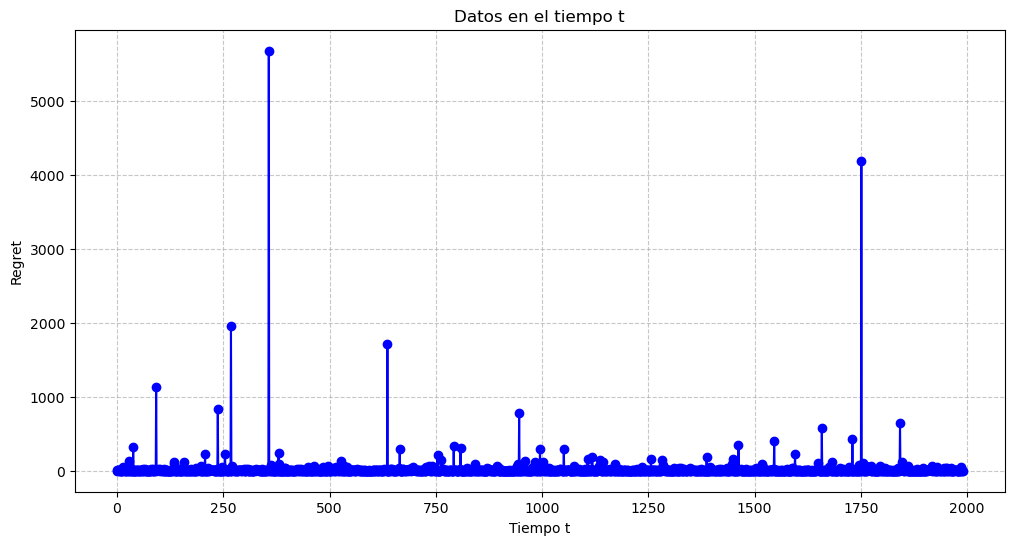

In [413]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets)), regrets, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [414]:
ventana

10

In [415]:
len(regrets)

1990

In [416]:
regrets_promedios = [np.mean(regrets[i::ventana-1]) for i in range(ventana-1)]


In [417]:
regrets_promedios

[9.775551196284676,
 13.384193993917341,
 22.40372920444828,
 11.575233580556755,
 8.688184713846649,
 26.597966534510427,
 44.27444809569014,
 22.40698314797746,
 9.482825024553845]

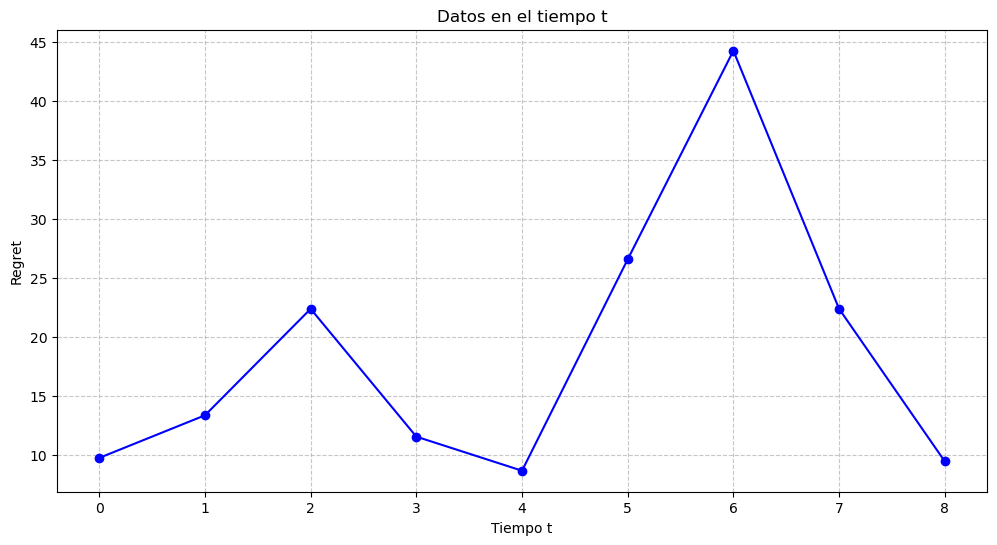

In [418]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedios)), regrets_promedios, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
### pendiente ana 7 dic 7.25 pm hacer los regrets promedios de las observaciones de loss dias (hacer grupitos de los dias 1's en cada ventana, los dias 2's en cada ventana, los dias 3's en cada ventana y asi)

In [323]:
### de la metodologia 1 me falta 1. evaluar la convergencia, 2. pensar como meto todas las realizaciones

In [ ]:
### markowitz : sacar la matriz de varianza y covarianza de los portafolios y la media esperada

In [ ]:
## pendientes: 
#1. la convergencias - distribuciones teoricas - ana 
#2. markowitz
#3. combinatorial - camilo
# 4. graficas medias